# Analyze Final Models: LCIA QSAR Study
**Date:** June 2, 2023 <br>

In [1]:
import matplotlib
# matplotlib.use('Agg')  # avoids rendering figures
import matplotlib.pyplot as plt

import pandas as pd 
import plot

import os.path
from config_management import UnifiedConfiguration
from data_management import DataManager
from metrics_management import MetricsManager
from results_management import ResultsManager
from results_analysis import ResultsAnalyzer

config_mapping_path = 'Input\configuration-mapping.json'
config = UnifiedConfiguration(config_mapping_path)

data_manager = DataManager(config.data, config.path)
metrics_manager = MetricsManager(config.category_to_dict('metric'))
results_manager = ResultsManager(
    output_dir='Results',
    results_file_type=config.data.file_type
)
results_analyzer = ResultsAnalyzer(
    results_manager, 
    data_manager, 
    config.path.seem3_exposure_file
)

Saving figure --> "Figures\feature_distributions\feature-distributions.png"


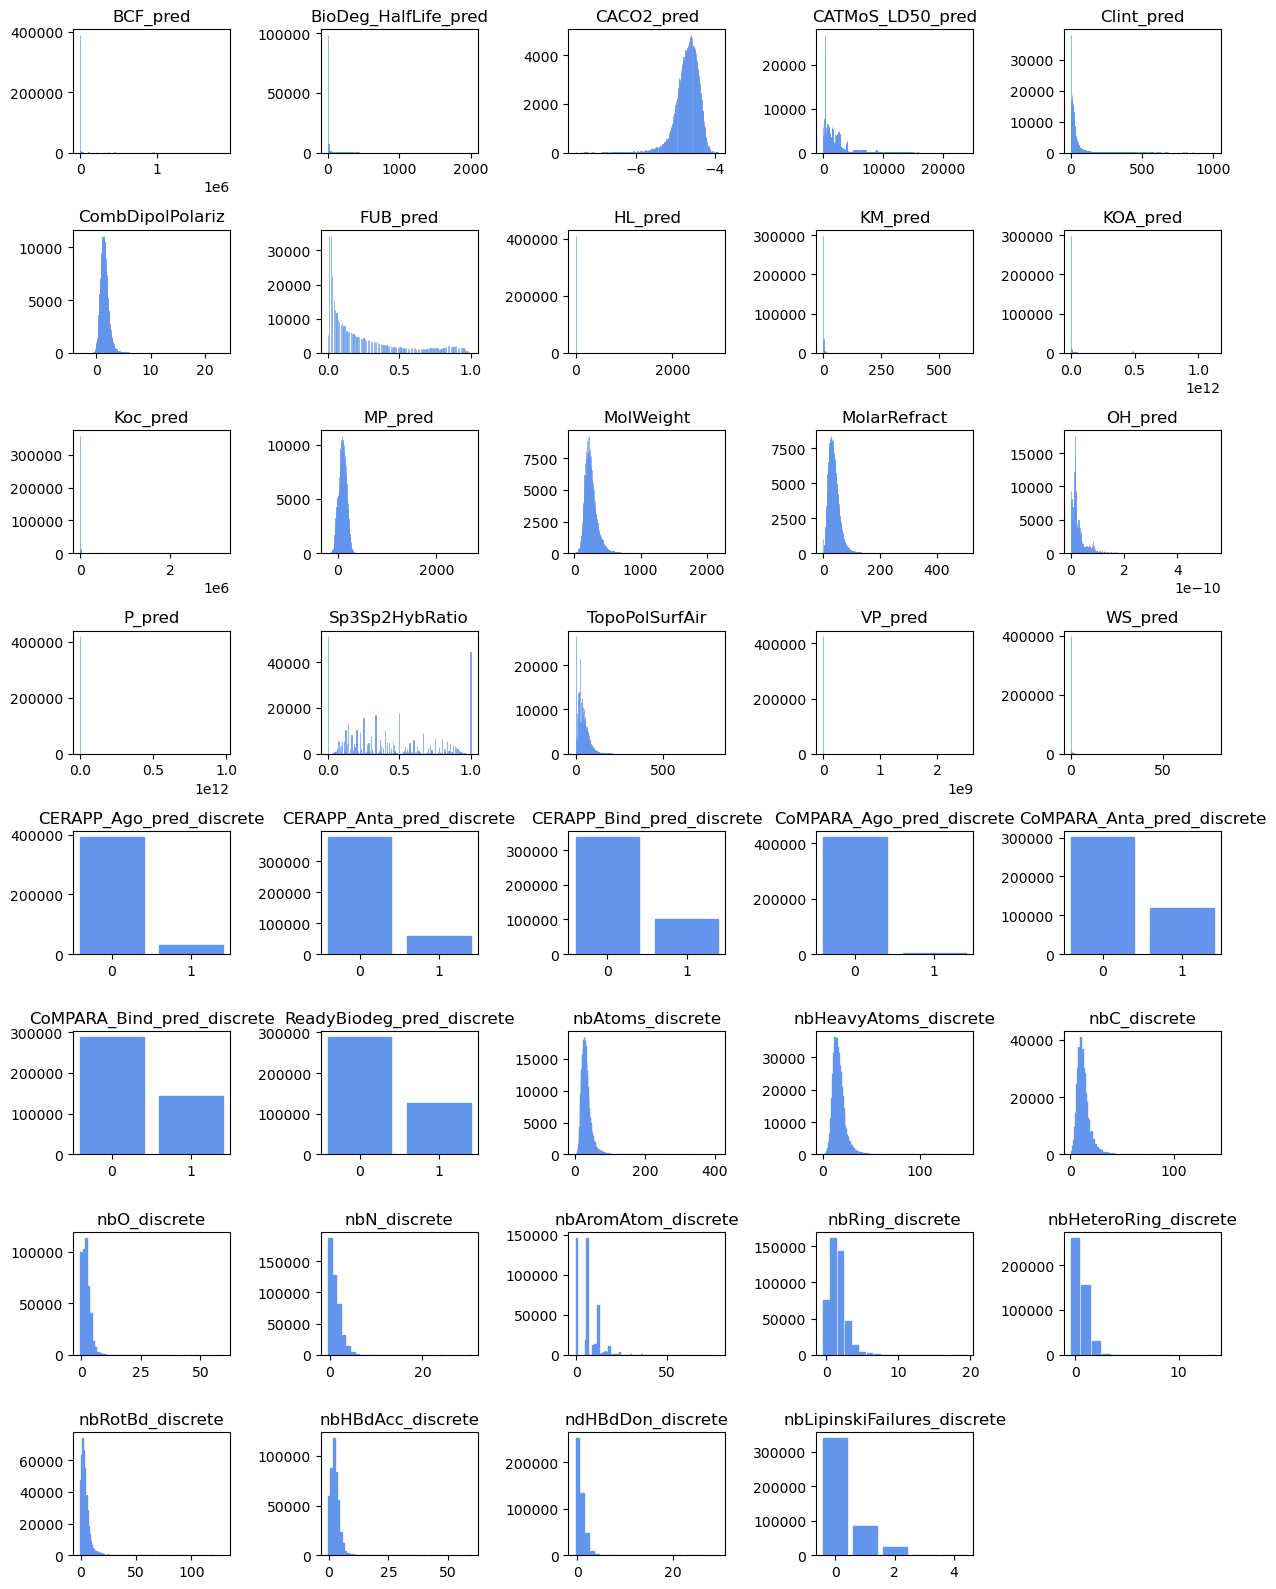

In [2]:
plot.feature_distributions(data_manager)

C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\plot.py:406: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Saving figure --> "Figures\proportions_incomplete_subplot\General-Toxicity-Reproductive-Developmental-Toxicity.png"


C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\plot.py:406: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Saving figure --> "Figures\proportions_incomplete_subplot\All-Chemicals.png"


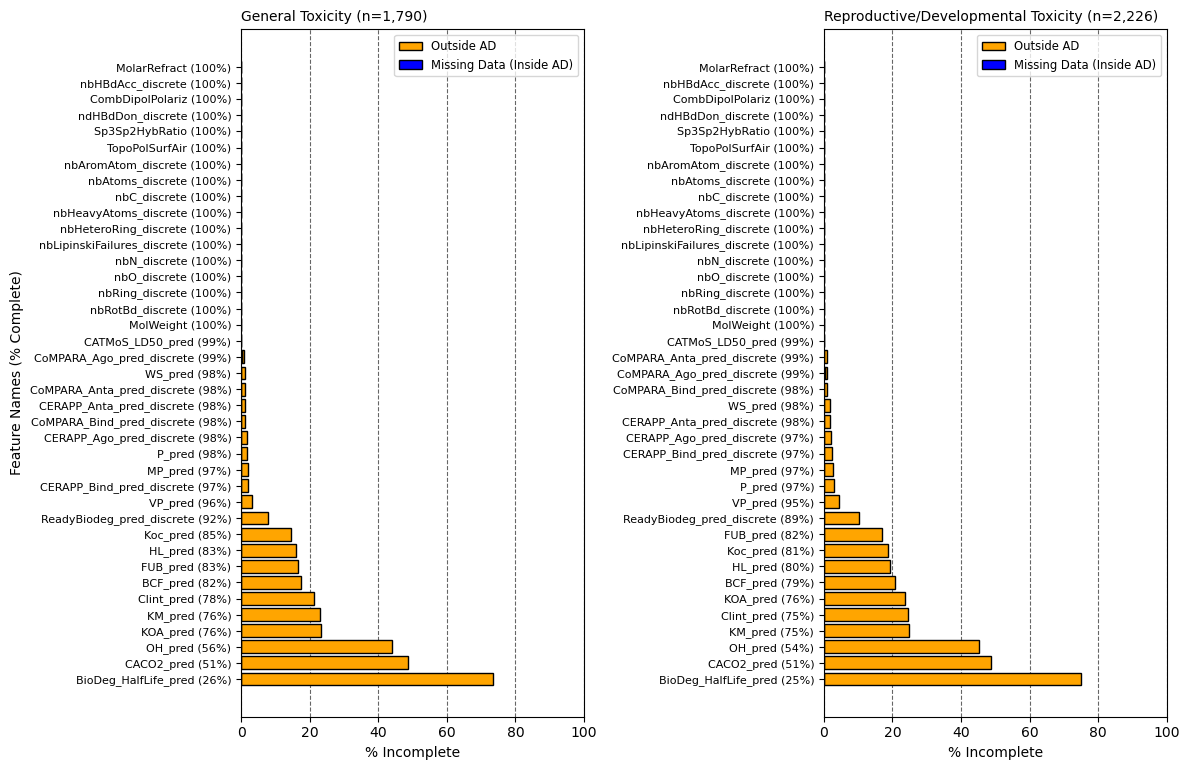

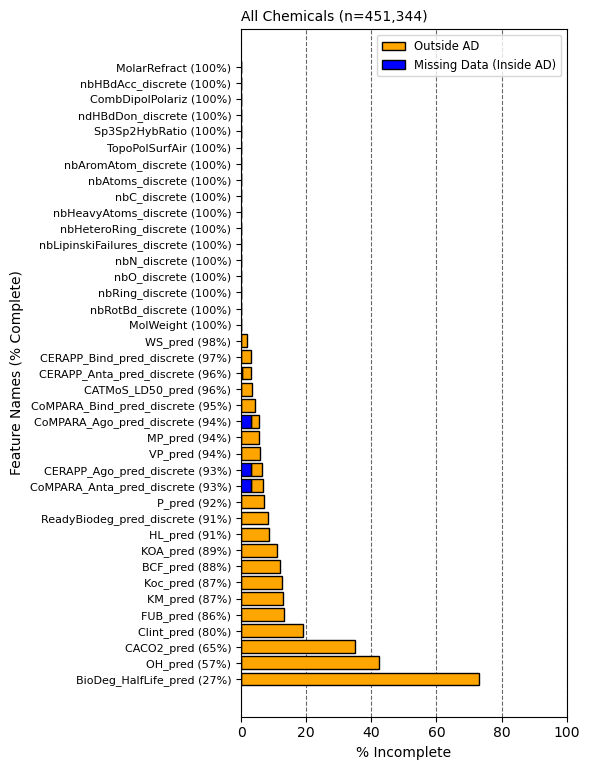

In [3]:
plot.proportions_incomplete_subplots(
    config.path.file_for_features_source['opera'], 
    config.path.opera_AD_file, 
    config.path.surrogate_pods_file,
    config.plot
)

Saving figure --> "Figures\pairwise_scatters_and_kde_subplots\all-opera-features-and-target-union.png"


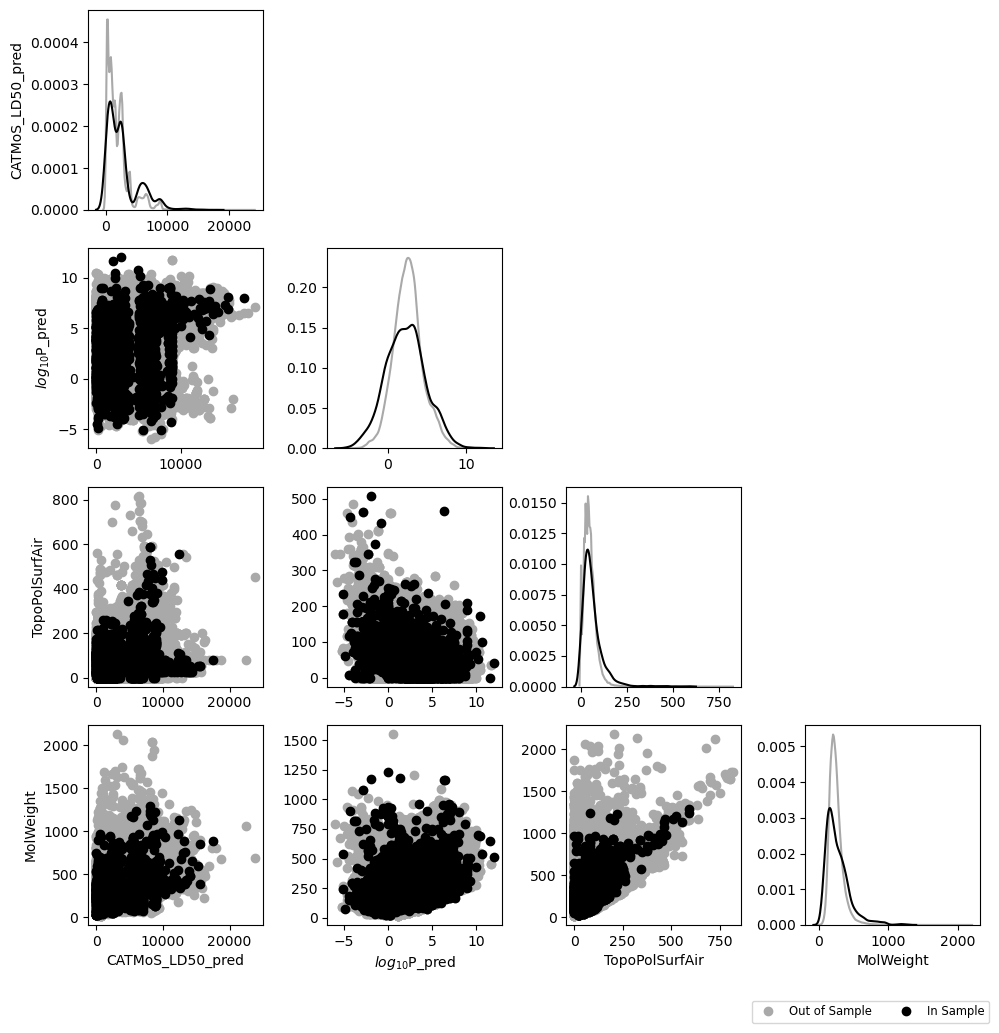

In [4]:
plot.pairwise_scatters_and_kde_subplots(
    config.path.file_for_features_source['opera'], 
    config.path.surrogate_pods_file,
    config.plot
)

Saving figure --> "Figures\important_feature_counts\opera-predicted-missing-true-RandomForestRegressor.png"


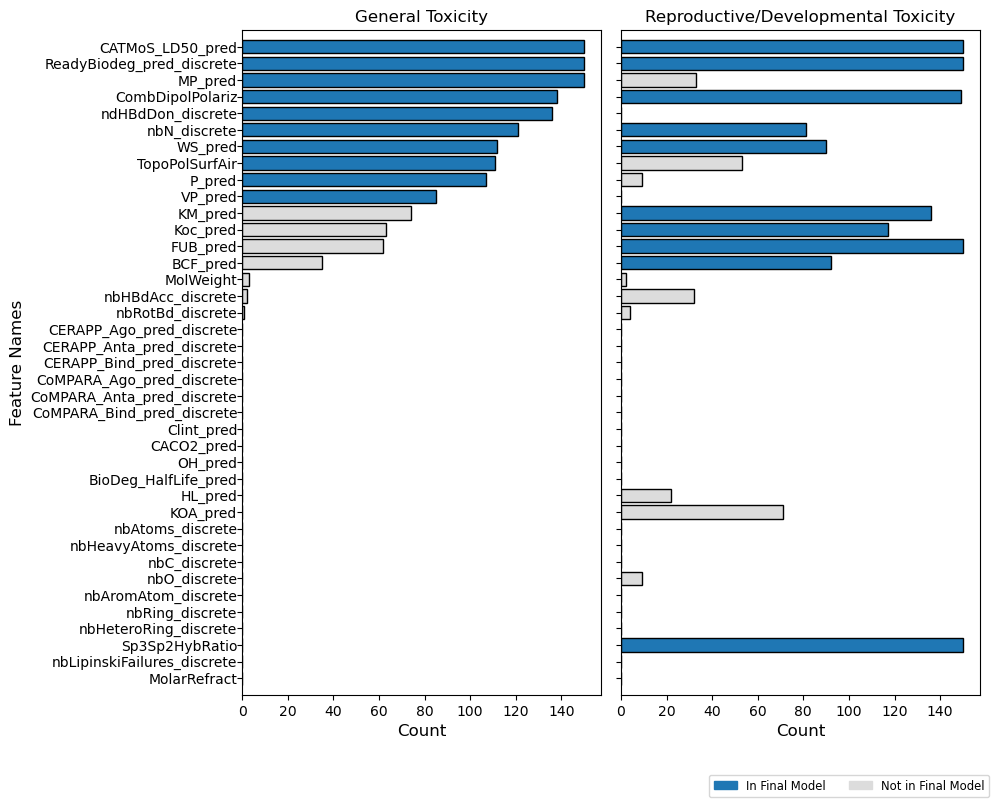

In [5]:
plot.important_feature_counts(results_analyzer, config.plot)

Saving figure --> "Figures\importances_boxplots\general-opera-predicted-missing-true-RandomForestRegressor.png"
Saving figure --> "Figures\importances_boxplots\repro_dev-opera-predicted-missing-true-RandomForestRegressor.png"


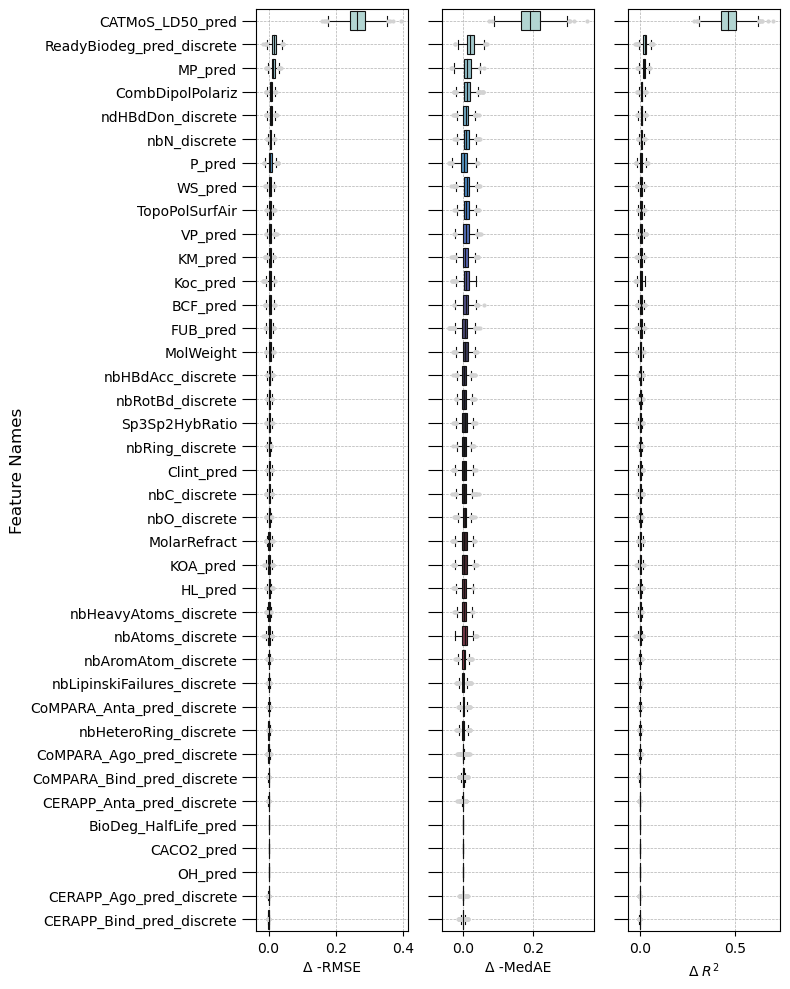

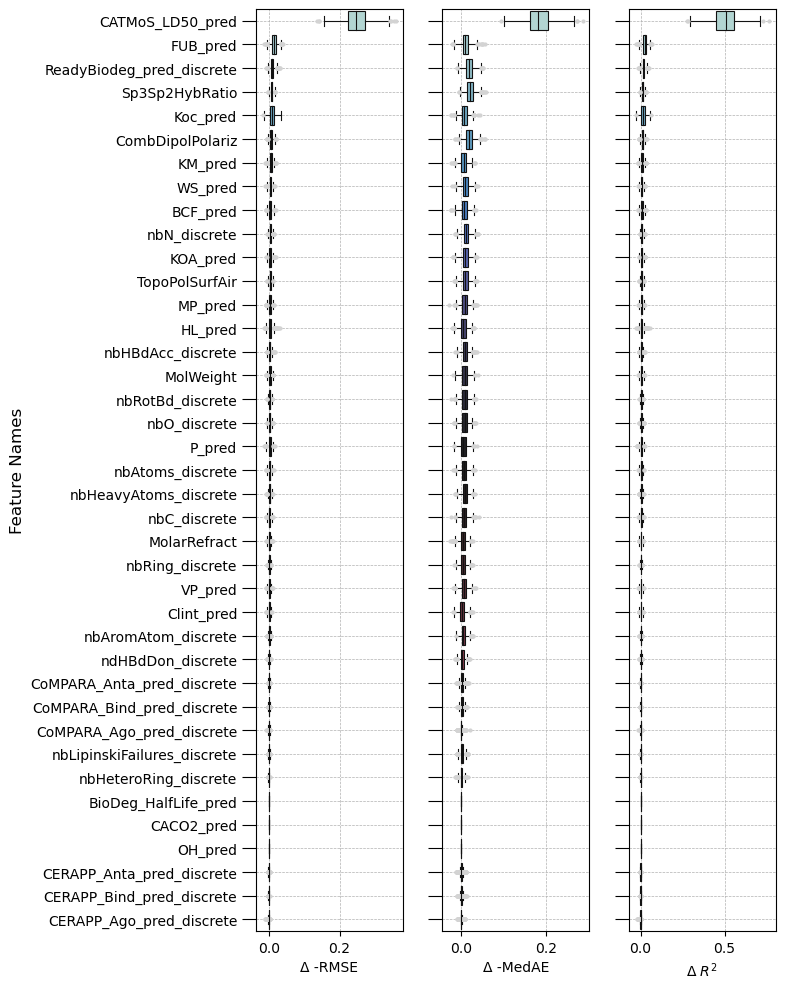

In [6]:
plot.importances_boxplots(results_analyzer, config.plot)

Saving figure --> "Figures\importances_replicates_boxplots\general-opera-predicted-missing-true-RandomForestRegressor.png"
Saving figure --> "Figures\importances_replicates_boxplots\repro_dev-opera-predicted-missing-true-RandomForestRegressor.png"


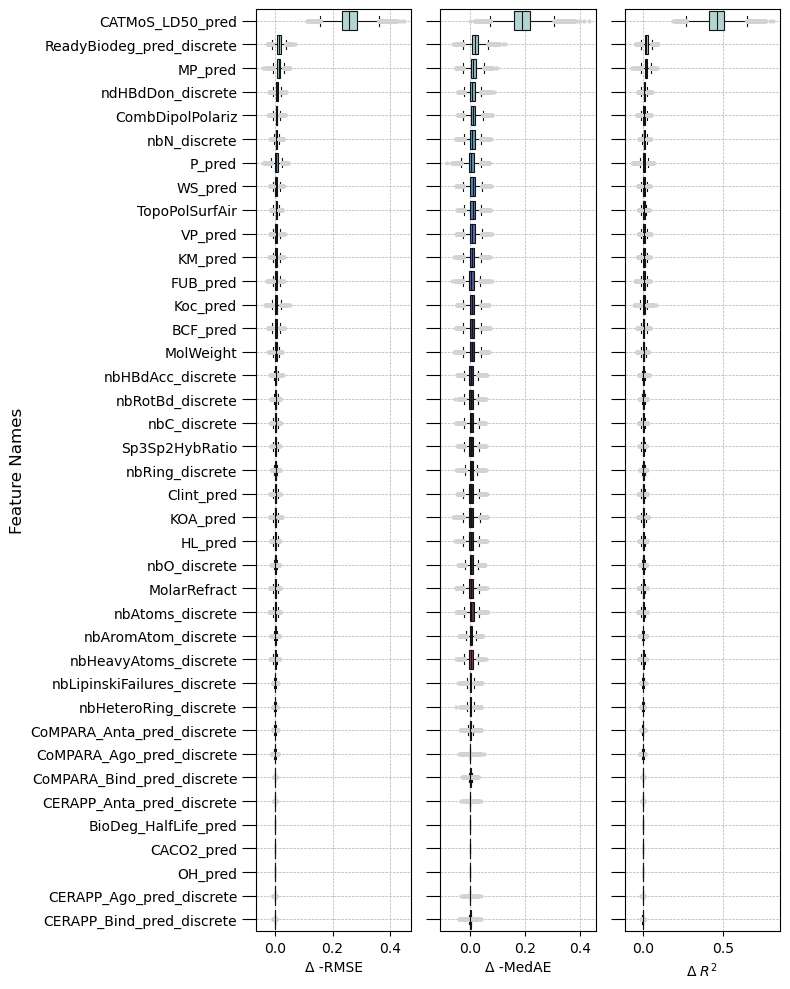

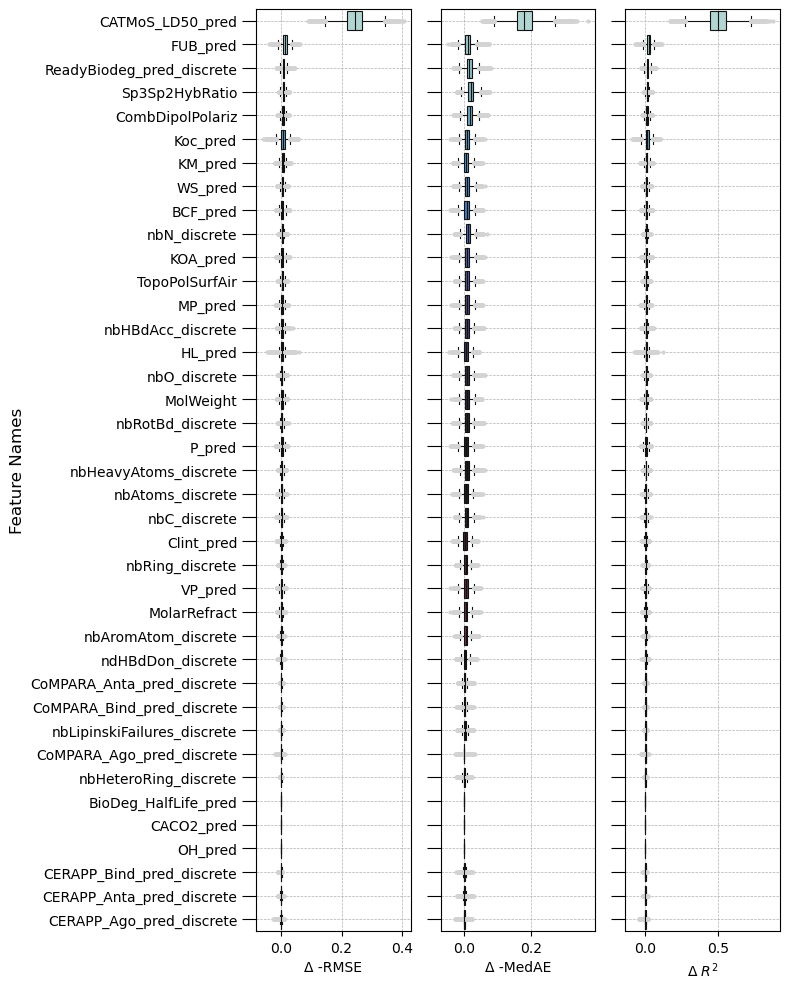

In [7]:
plot.importances_replicates_boxplots(results_analyzer, config.plot)

C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\plot.py:602: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs1.tight_layout(fig, rect=[0, 0, 0.7, 1])
C:\Users\jkvas\Google Drive\My Drive\Repositories\LCIA-QSAR-Model\plot.py:603: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs2.tight_layout(fig, rect=[0.7, 0, 1, 1], h_pad=0.5)


Saving figure --> "Figures\in_sample_performance_comparisons\opera-predicted-missing-RandomForestRegressor.png"
Saving figure --> "Figures\out_of_sample_prediction_scatterplots\opera-predicted-missing-RandomForestRegressor.png"


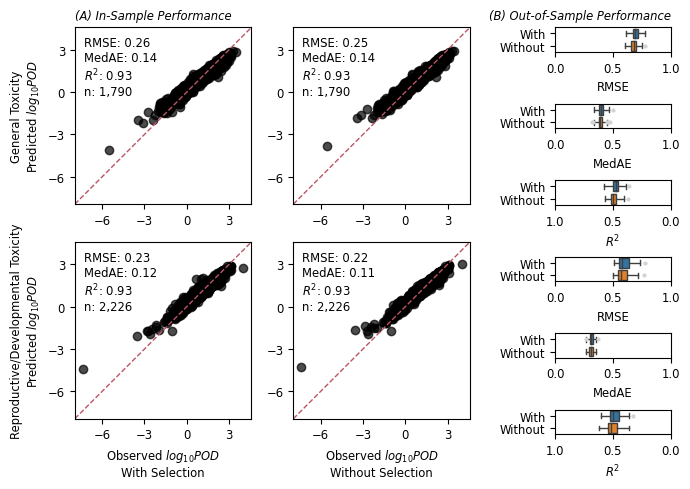

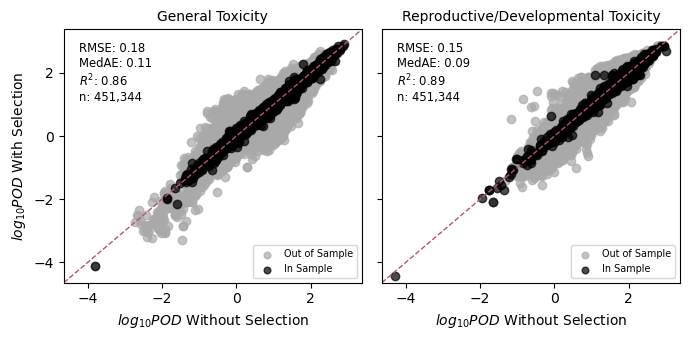

In [8]:
plot.in_and_out_sample_comparisons(
    results_analyzer, 
    config.plot, 
    metrics_manager.function_for_metric
)

Saving figure --> "Figures\benchmarking_scatterplots\comptox-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-experimental-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-complete-false-RandomForestRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-GradientBoostingRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-LinearRegression.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-MLPRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-Ridge.png"
Saving figure --> "Figures\benchmarking_scatterplots\opera-predicted-missing-false-SVR.png"
Saving figure --> "Figures\benchmarking_scatterp

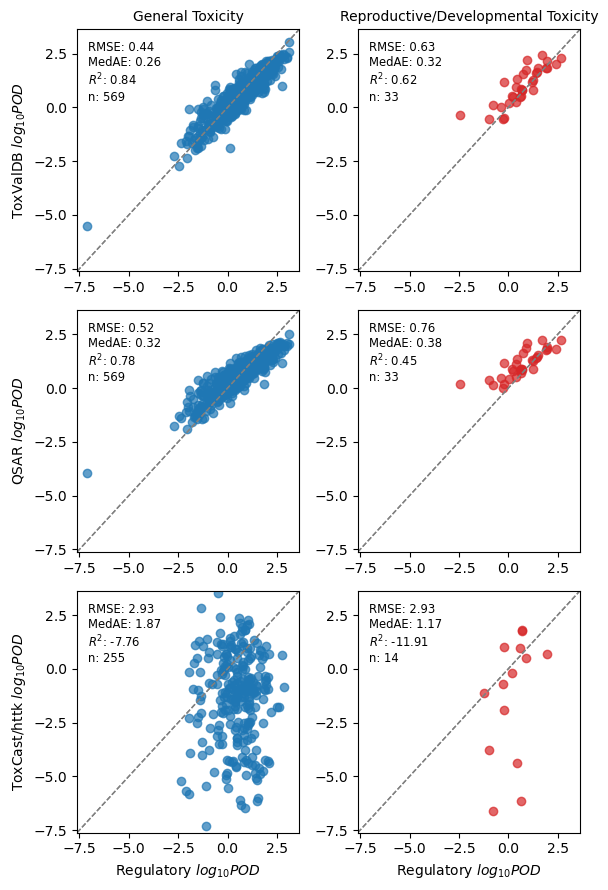

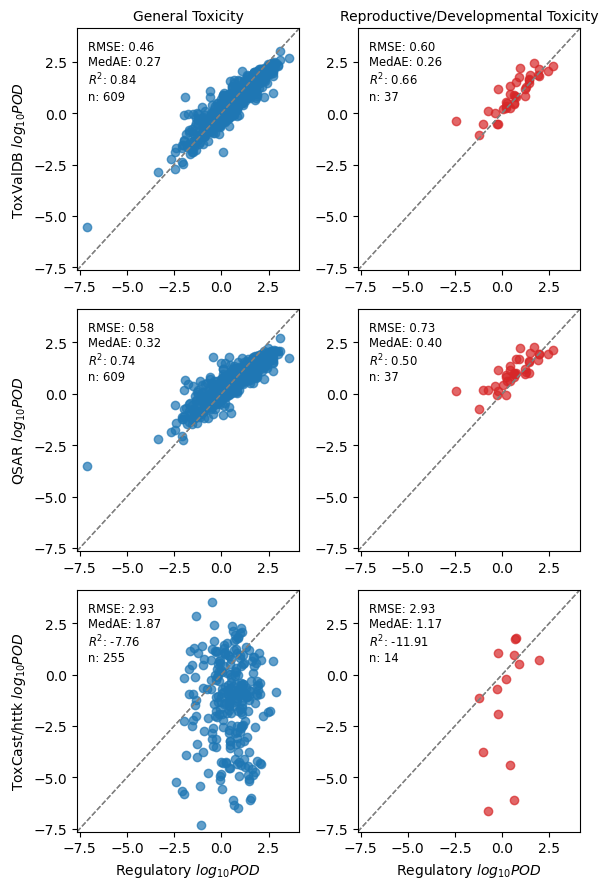

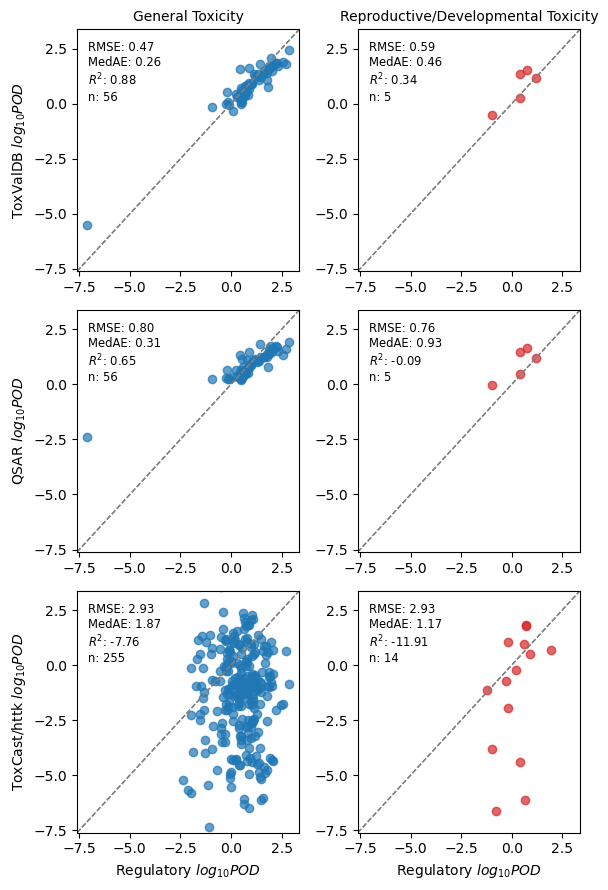

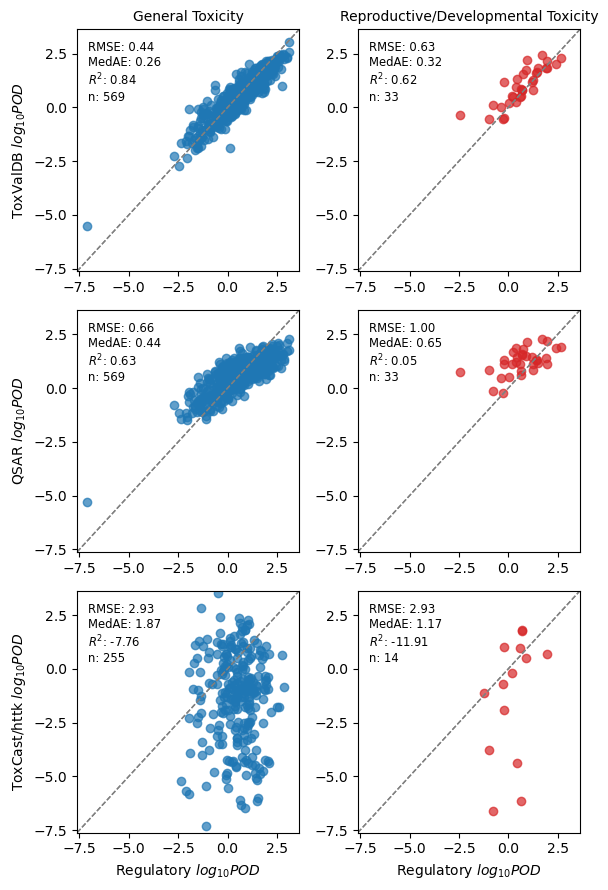

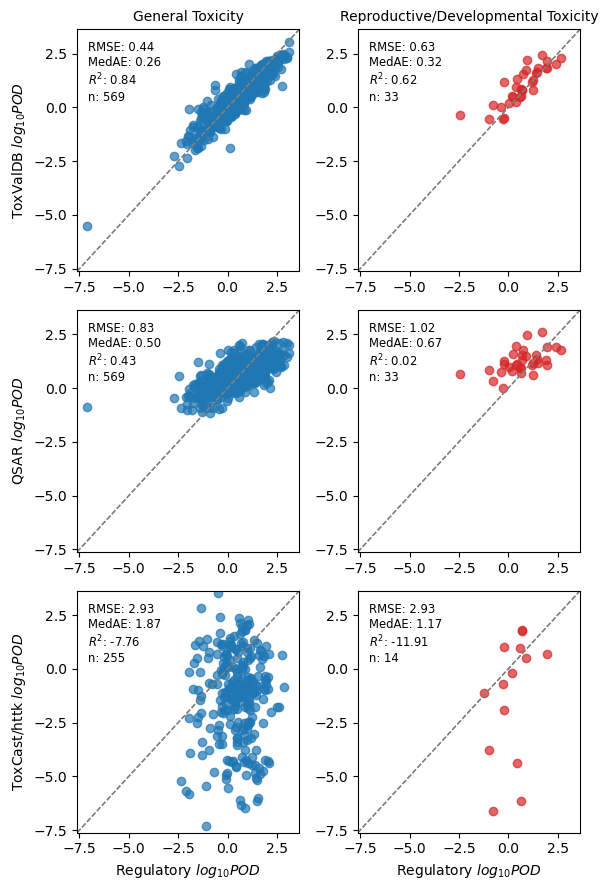

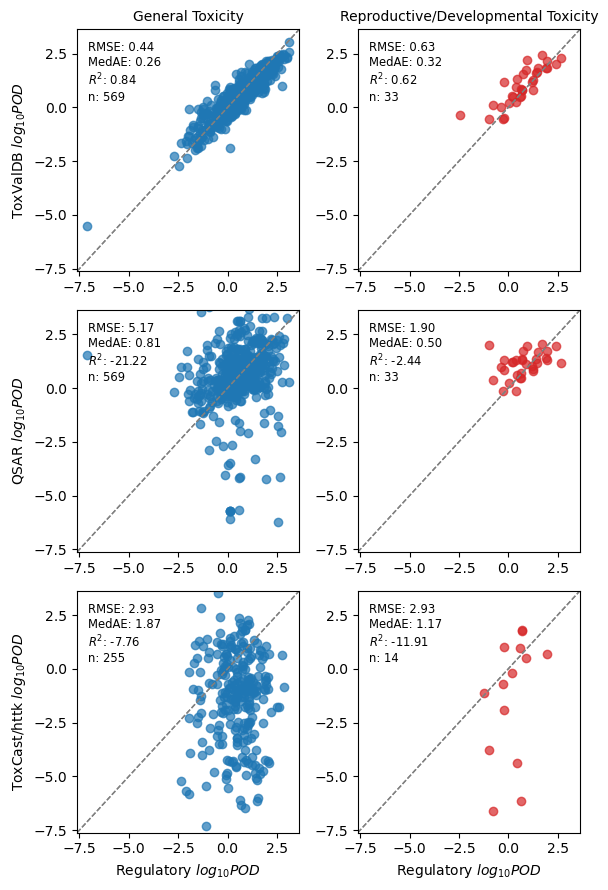

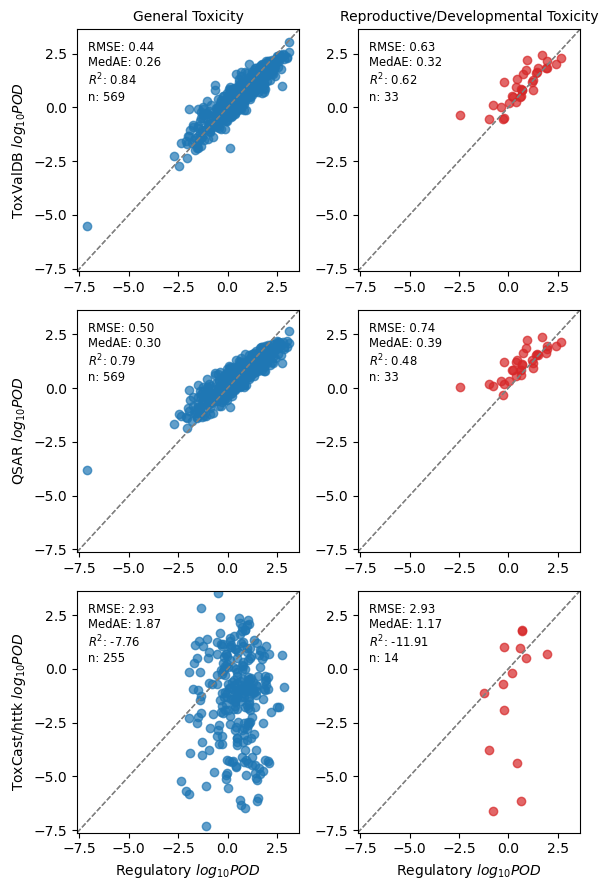

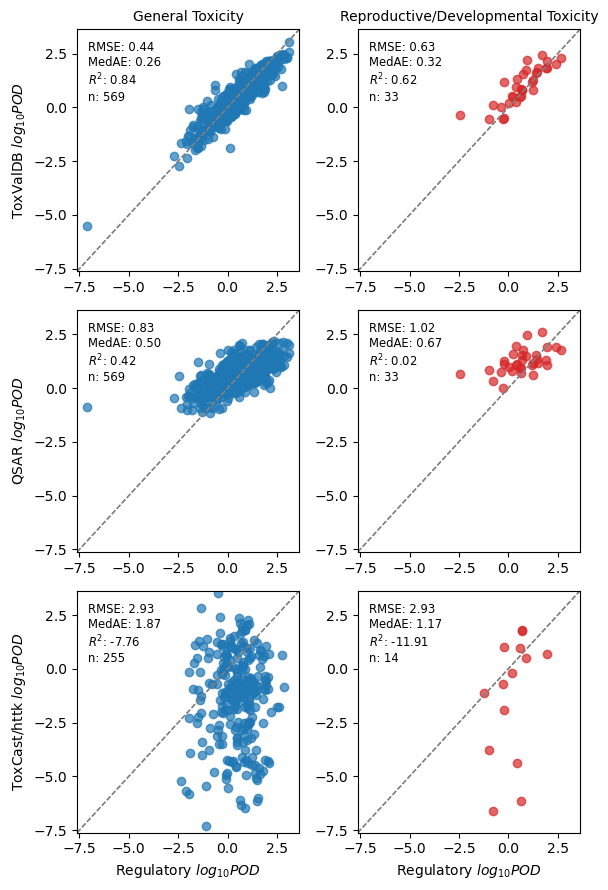

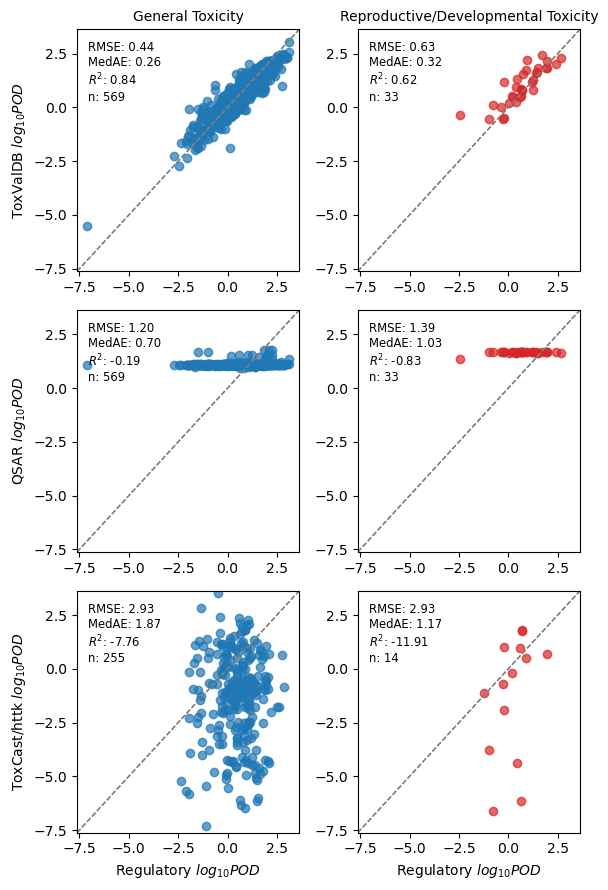

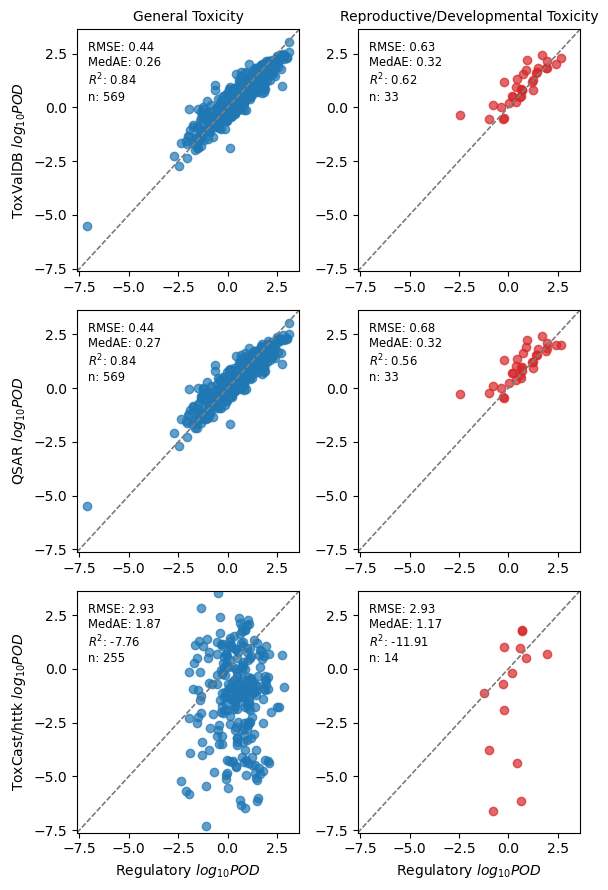

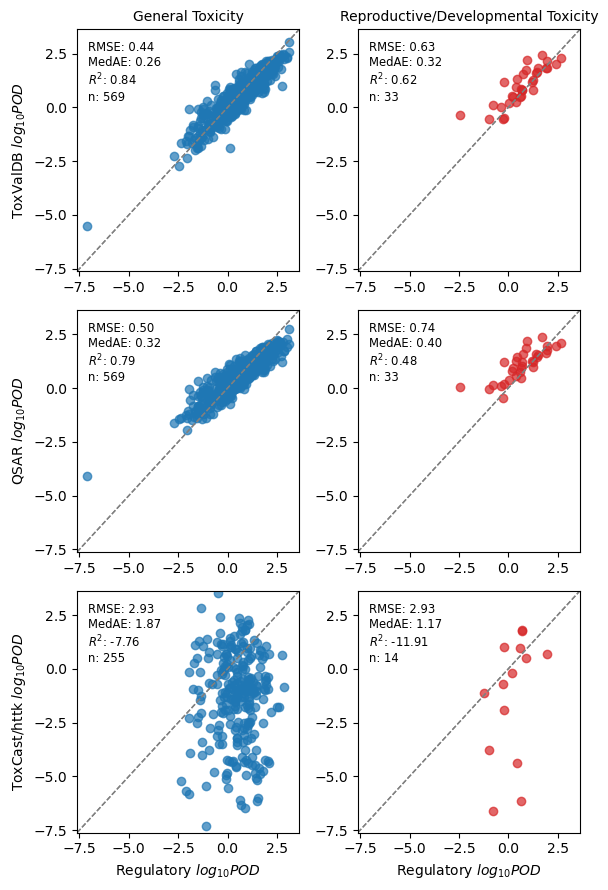

In [9]:
# TODO: Move to DataManager
y_regulatory_df = pd.read_csv(config.path.regulatory_pods_file, index_col=0)

y_toxcast = (
    pd.read_csv(config.path.toxcast_oeds_file, index_col=0)
    ['tox_httk_50']
)

plot.benchmarking_scatterplots(
    results_analyzer,
    y_regulatory_df,
    y_toxcast,
    metrics_manager.function_for_metric,
    config.plot
)

Saving figure --> "Figures\margins_of_exposure_cumulative\comptox-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-experimental-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-complete-false-RandomForestRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-GradientBoostingRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-LinearRegression.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-MLPRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-Ridge.png"
Saving figure --> "Figures\margins_of_exposure_cumulative\opera-predicted-missing-false-SVR.png"
Sav

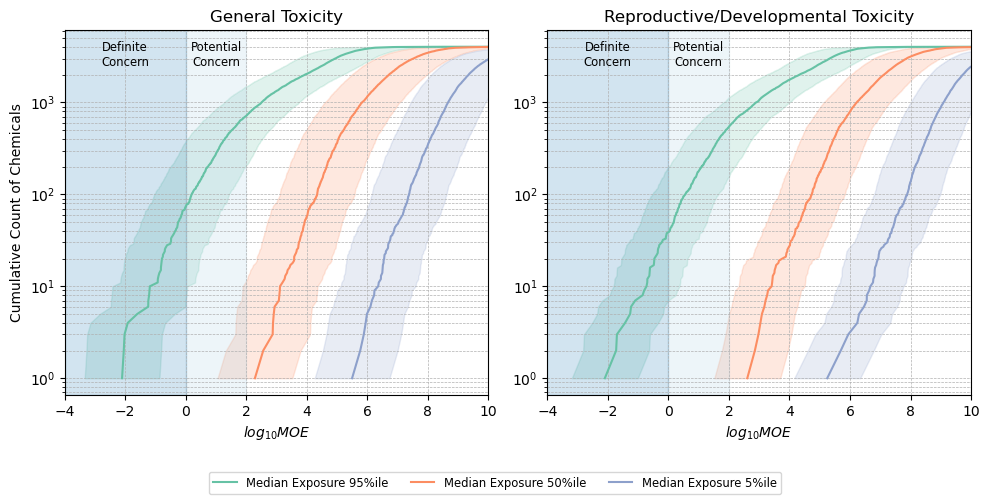

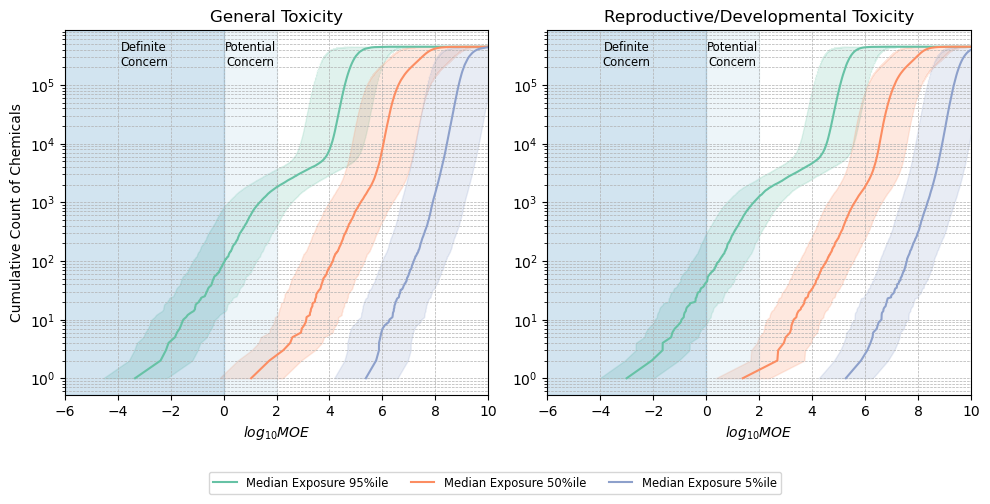

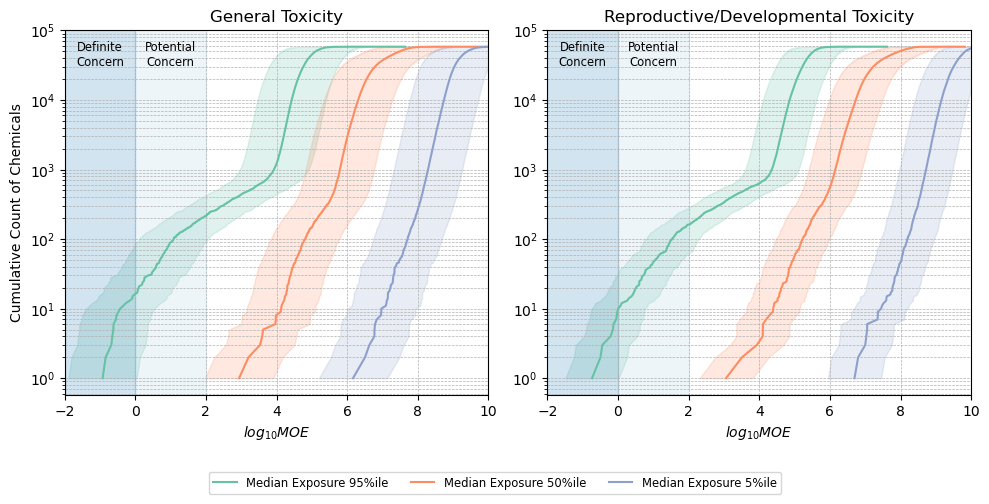

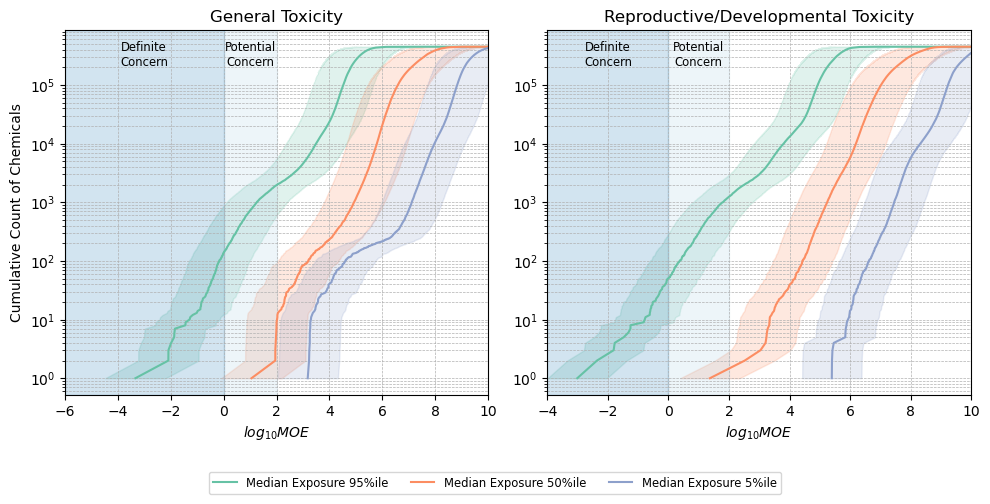

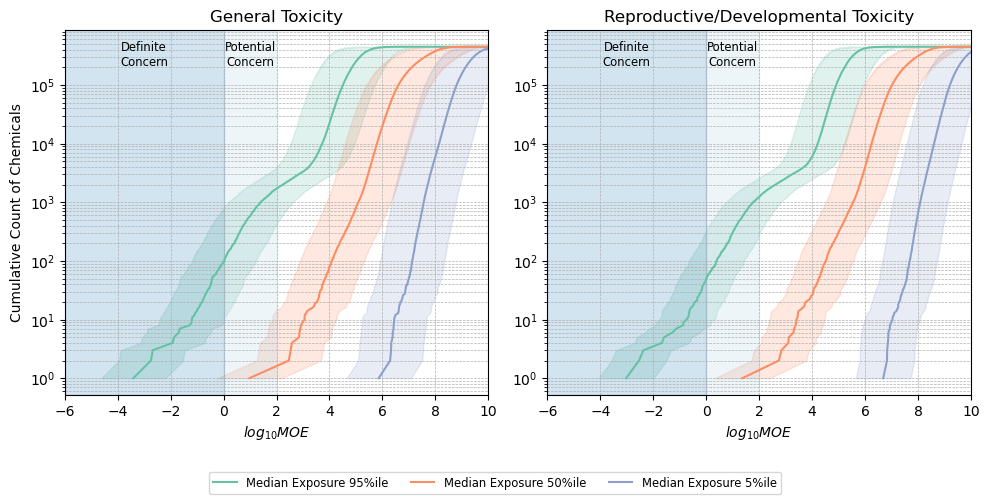

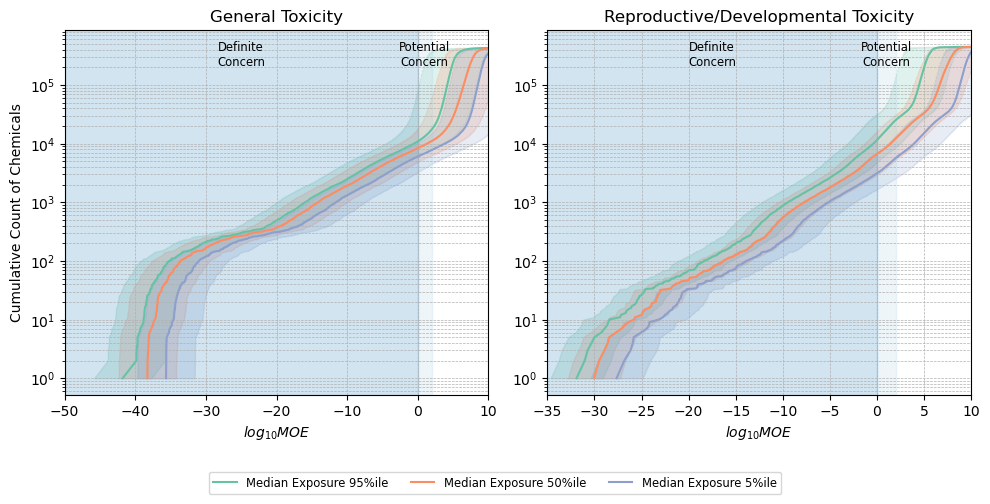

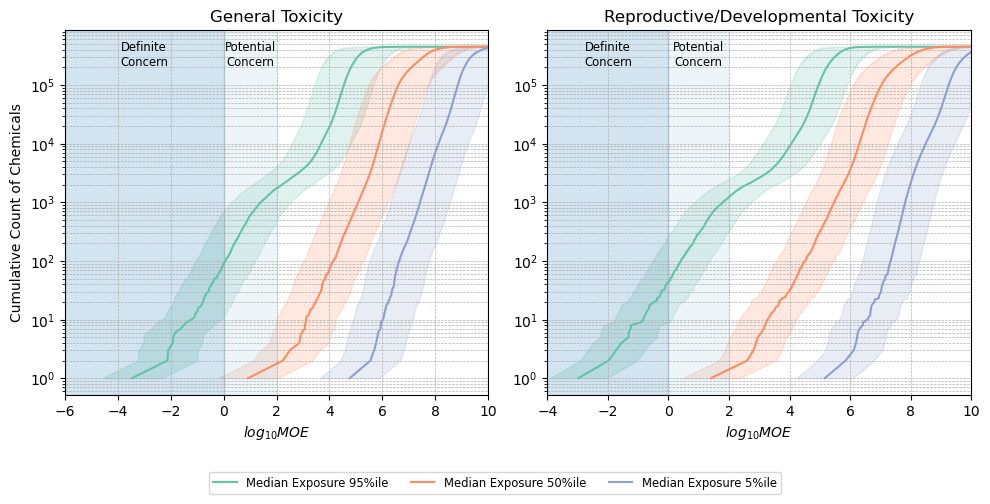

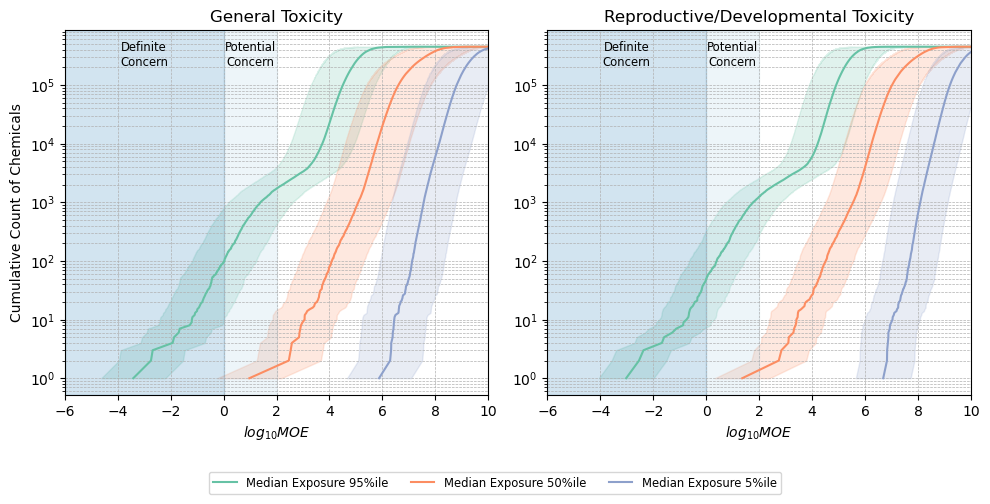

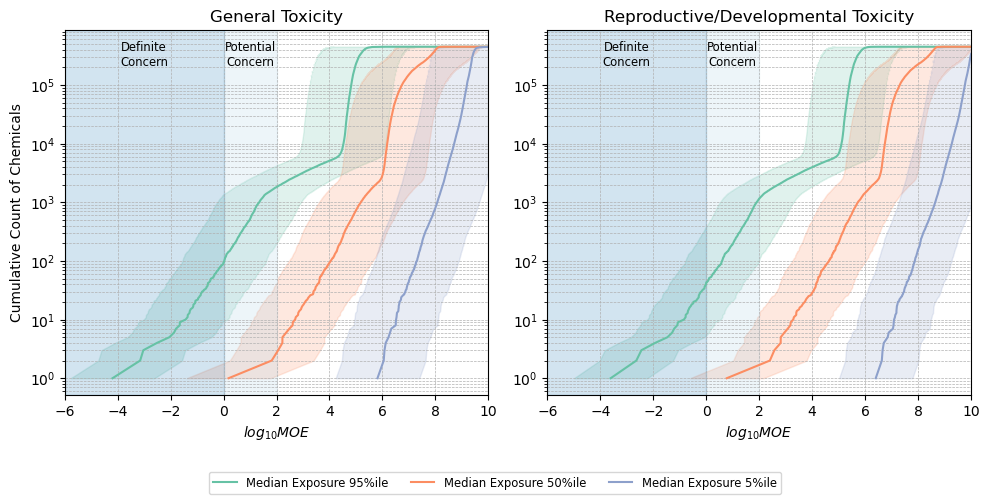

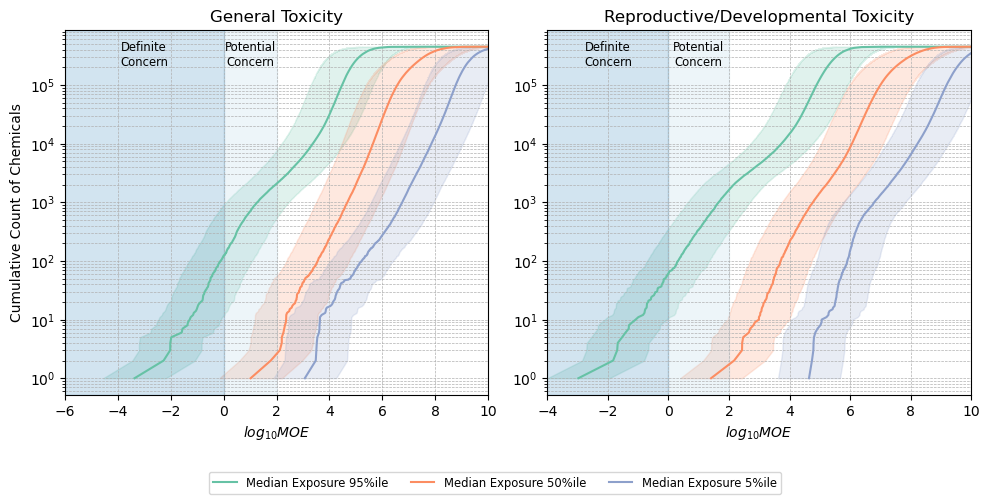

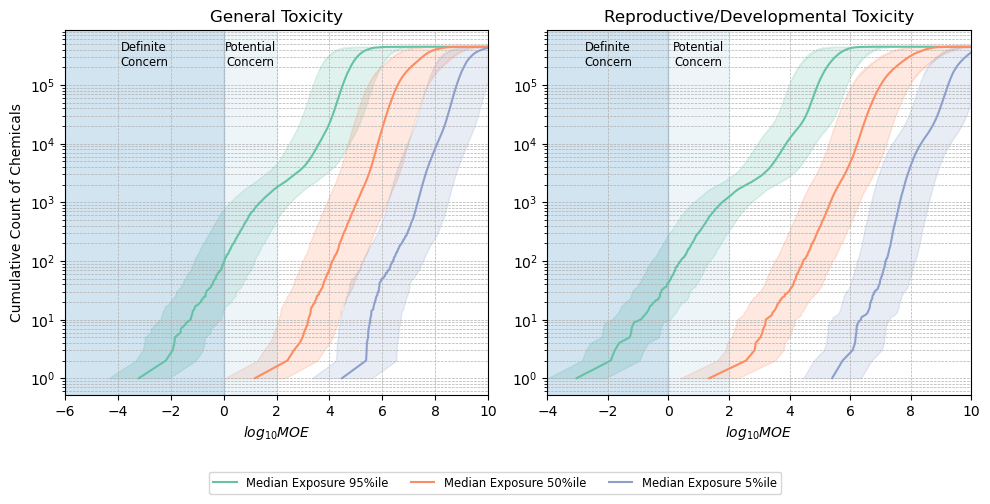

In [10]:
plot.margins_of_exposure_cumulative(
    results_analyzer, 
    config.plot,
    right_truncation=10.
)

Saving figure --> "Figures\predictions_by_missing_feature\comptox-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-experimental-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-complete-false-RandomForestRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-GradientBoostingRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-LinearRegression.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-MLPRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-RandomForestRegressor.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-Ridge.png"
Saving figure --> "Figures\predictions_by_missing_feature\opera-predicted-missing-false-SVR.png"
Sav

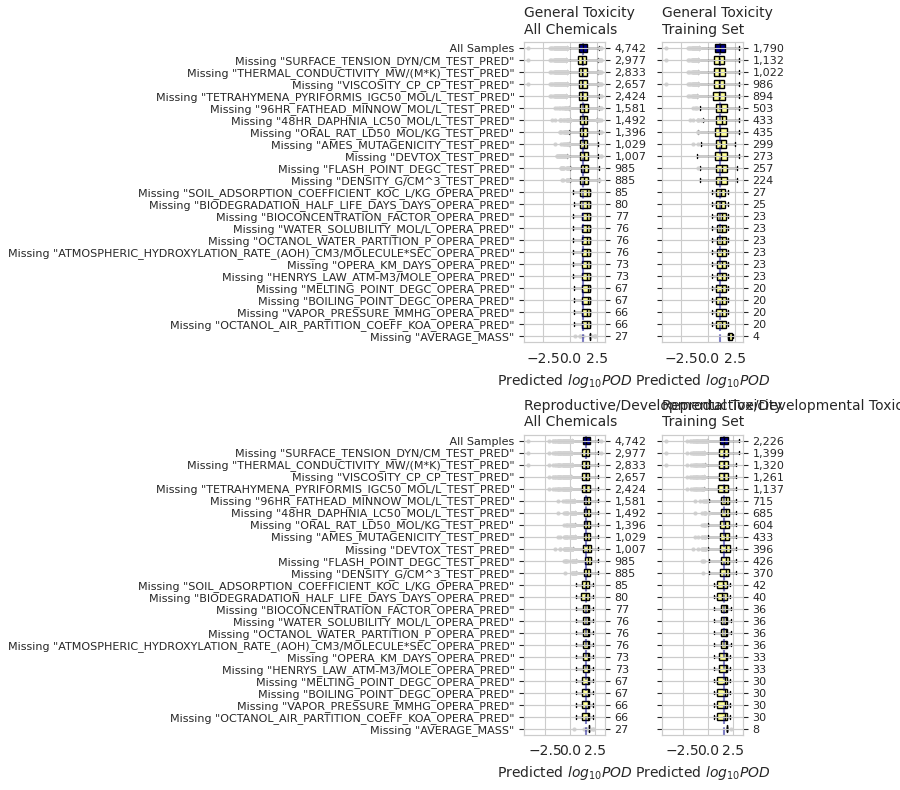

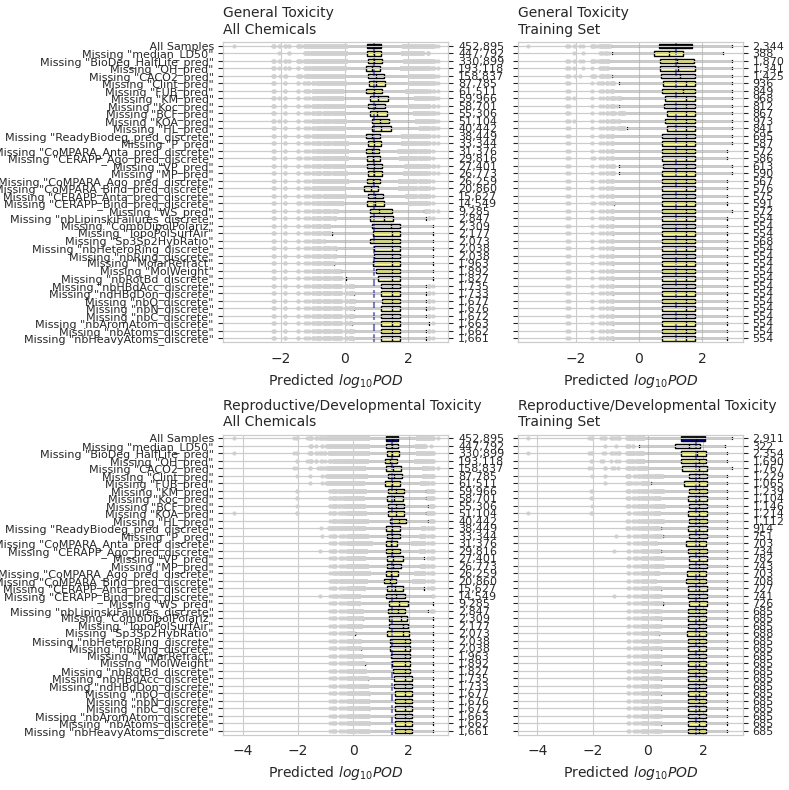

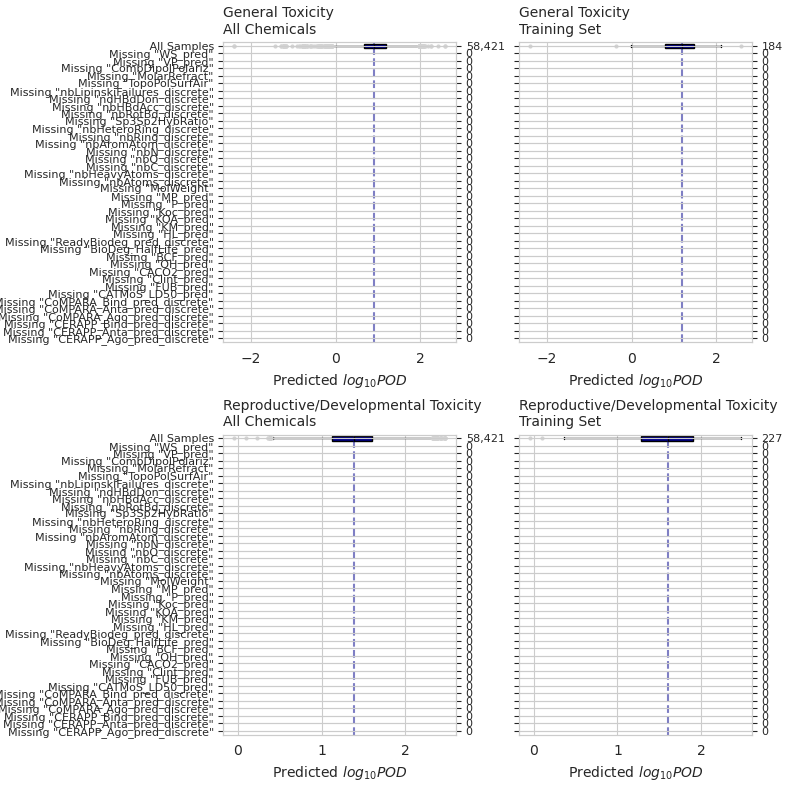

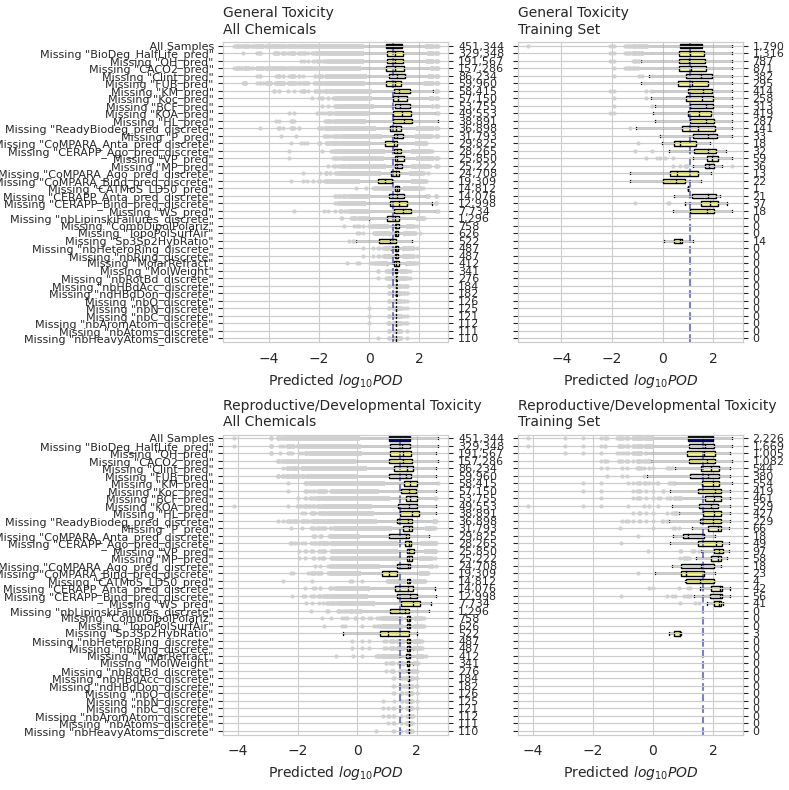

In [ ]:
plot.predictions_by_missing_feature(results_analyzer, config.plot)

In [ ]:
plot.sensitivity_analysis_boxplots(results_manager, config.plot)